# Bird distributions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

birds = pd.read_csv('../../data/birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


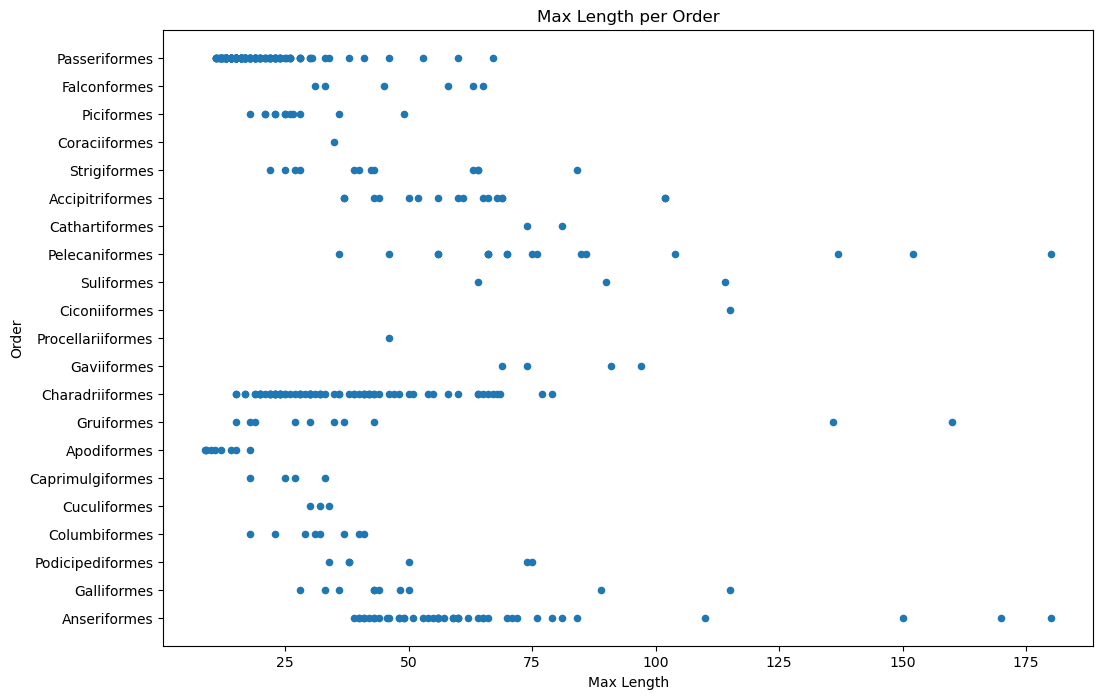

In [3]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,8))

plt.title('Max Length per Order')
plt.xlabel('Max Length')
plt.ylabel('Order')

plt.show()

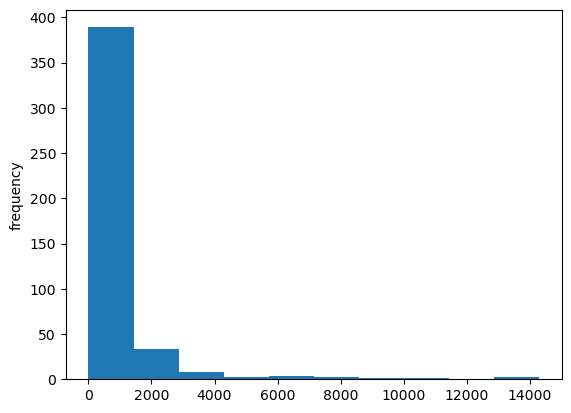

In [4]:
plt.hist(birds['MaxBodyMass'], bins=10)
plt.ylabel('frequency')

plt.show()

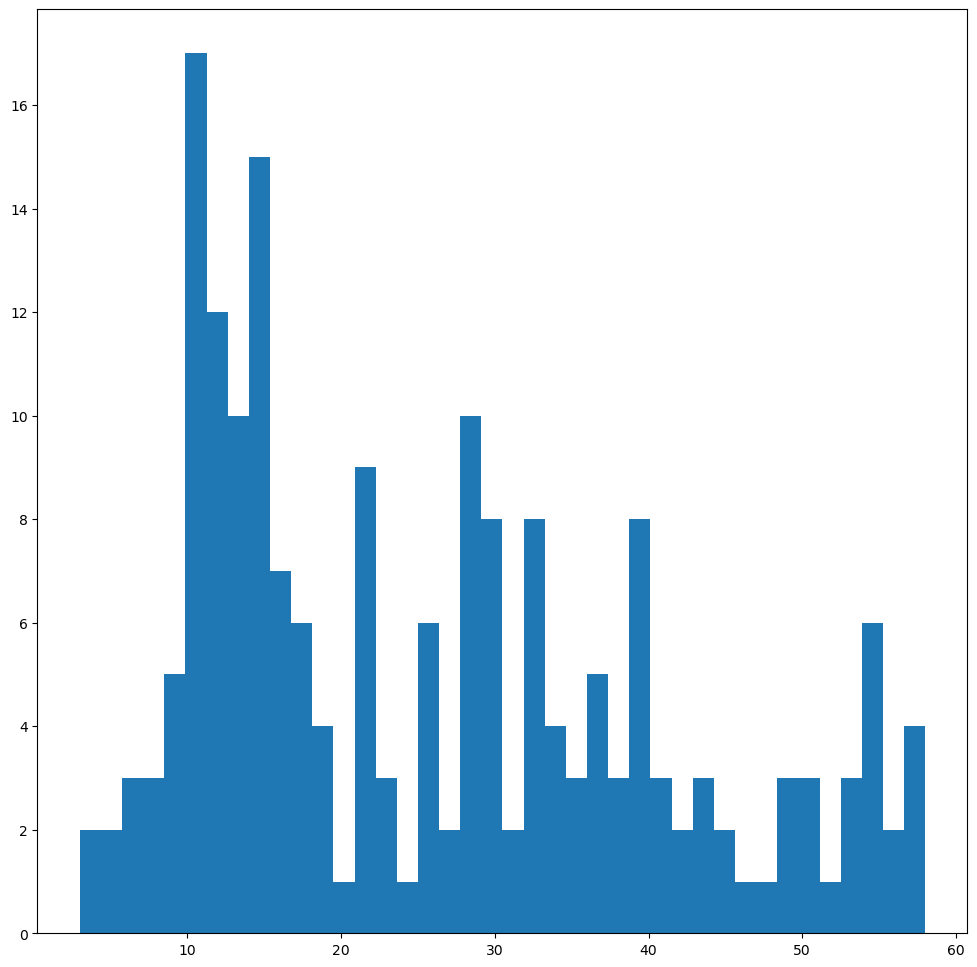

In [11]:
filtered_birds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]

plt.rcParams['figure.figsize'] = [12,12]
plt.hist(filtered_birds['MaxBodyMass'],bins=40)

plt.show()

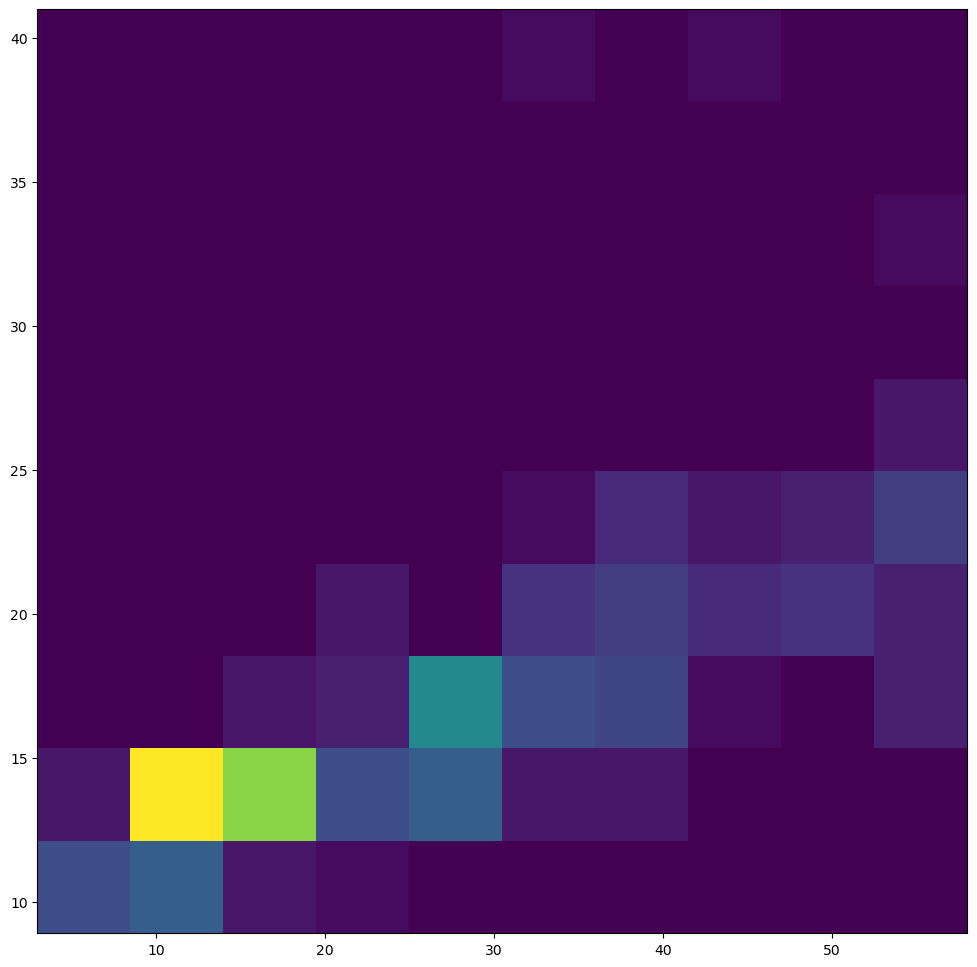

In [15]:
x = filtered_birds['MaxBodyMass']
y = filtered_birds['MaxLength']

plt.hist2d(x,y)
plt.show()

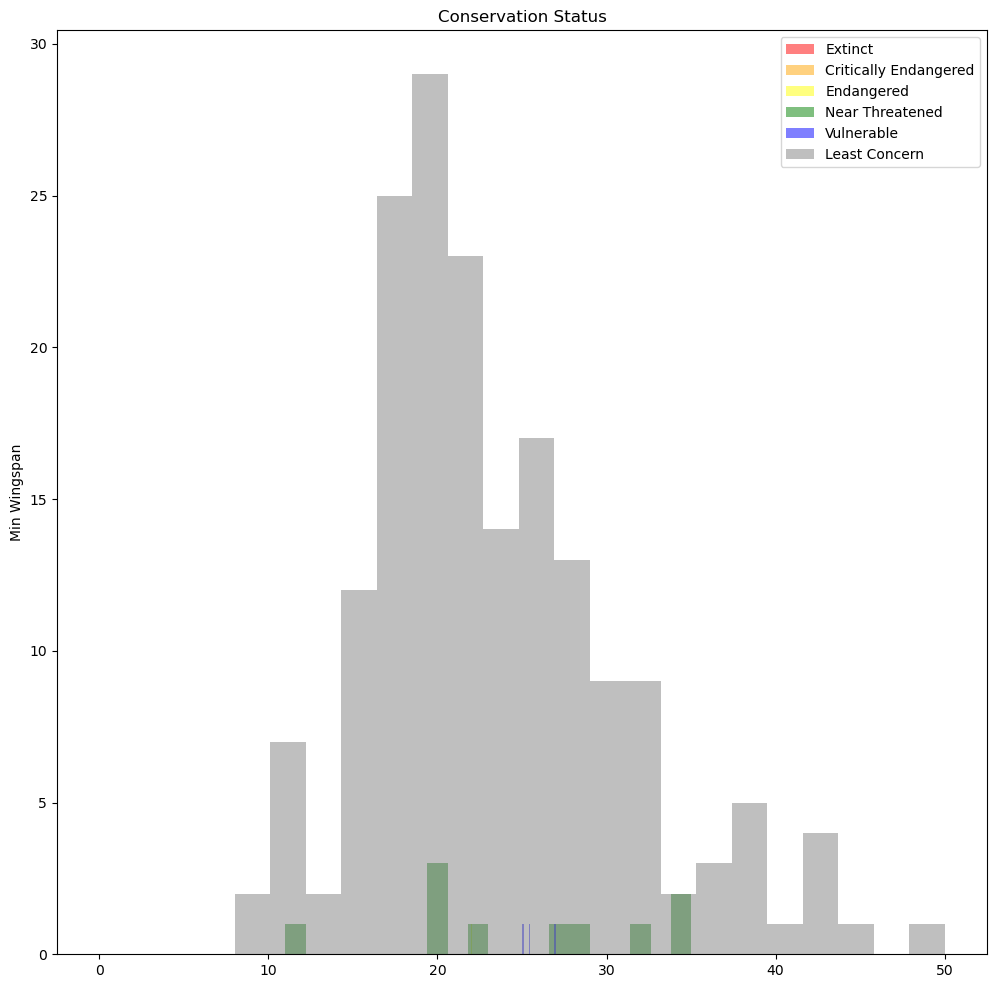

In [17]:
x1 = filtered_birds.loc[filtered_birds.ConservationStatus=='EX', 'MinWingspan']
x2 = filtered_birds.loc[filtered_birds.ConservationStatus=='CR', 'MinWingspan']
x3 = filtered_birds.loc[filtered_birds.ConservationStatus=='EN', 'MinWingspan']
x4 = filtered_birds.loc[filtered_birds.ConservationStatus=='NT', 'MinWingspan']
x5 = filtered_birds.loc[filtered_birds.ConservationStatus=='VU', 'MinWingspan']
x6 = filtered_birds.loc[filtered_birds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend()

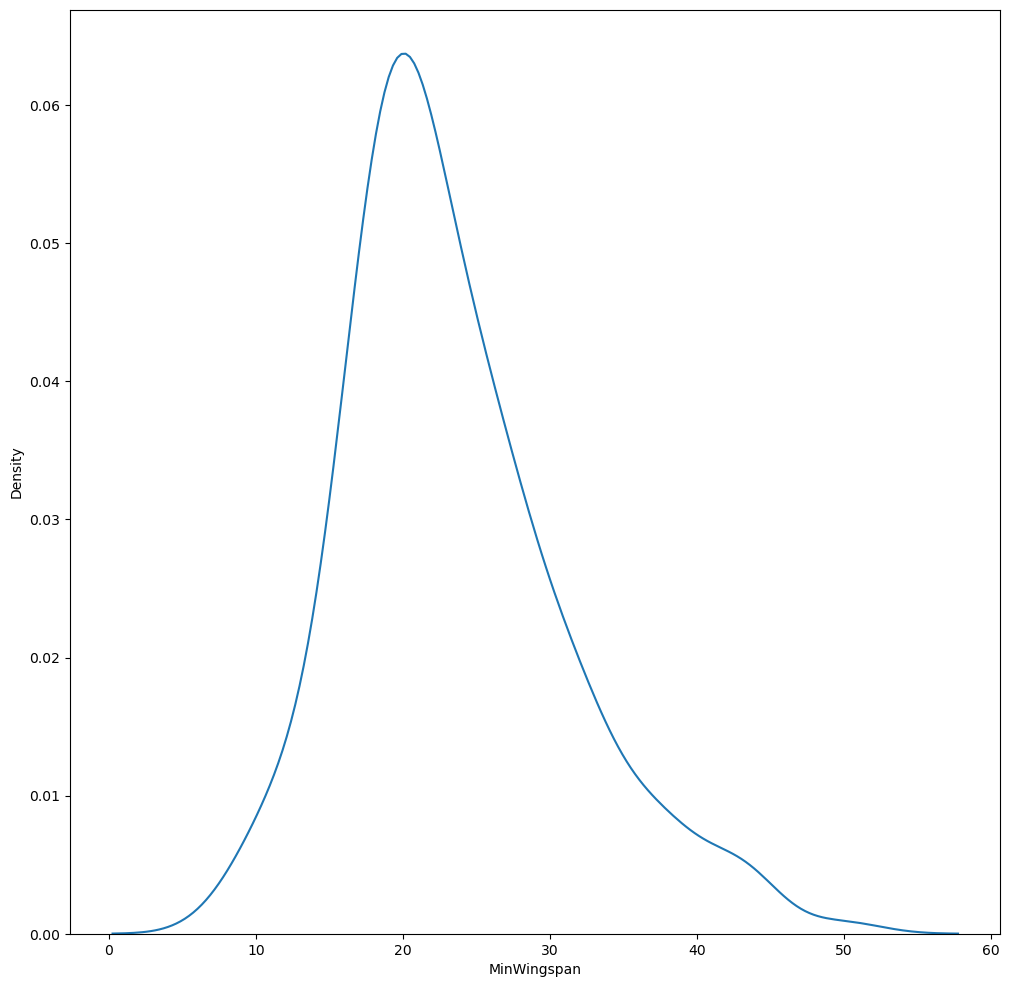

In [18]:
import seaborn as sns

sns.kdeplot(filtered_birds['MinWingspan'])

plt.show()

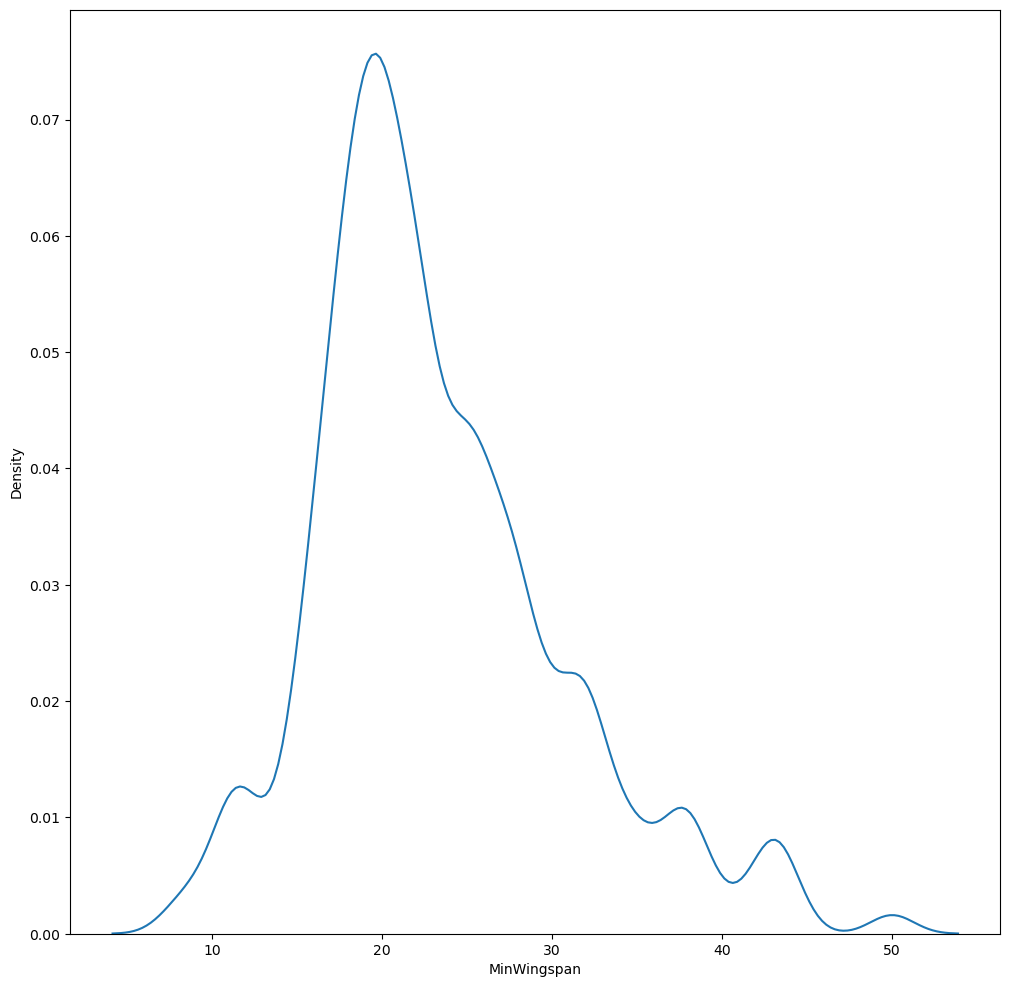

In [20]:
sns.kdeplot(filtered_birds['MinWingspan'], bw_adjust=0.5)
plt.show()

C:\Users\ia0070483\AppData\Local\Temp\ipykernel_39076\3681031541.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='MaxBodyMass', ylabel='Density'>

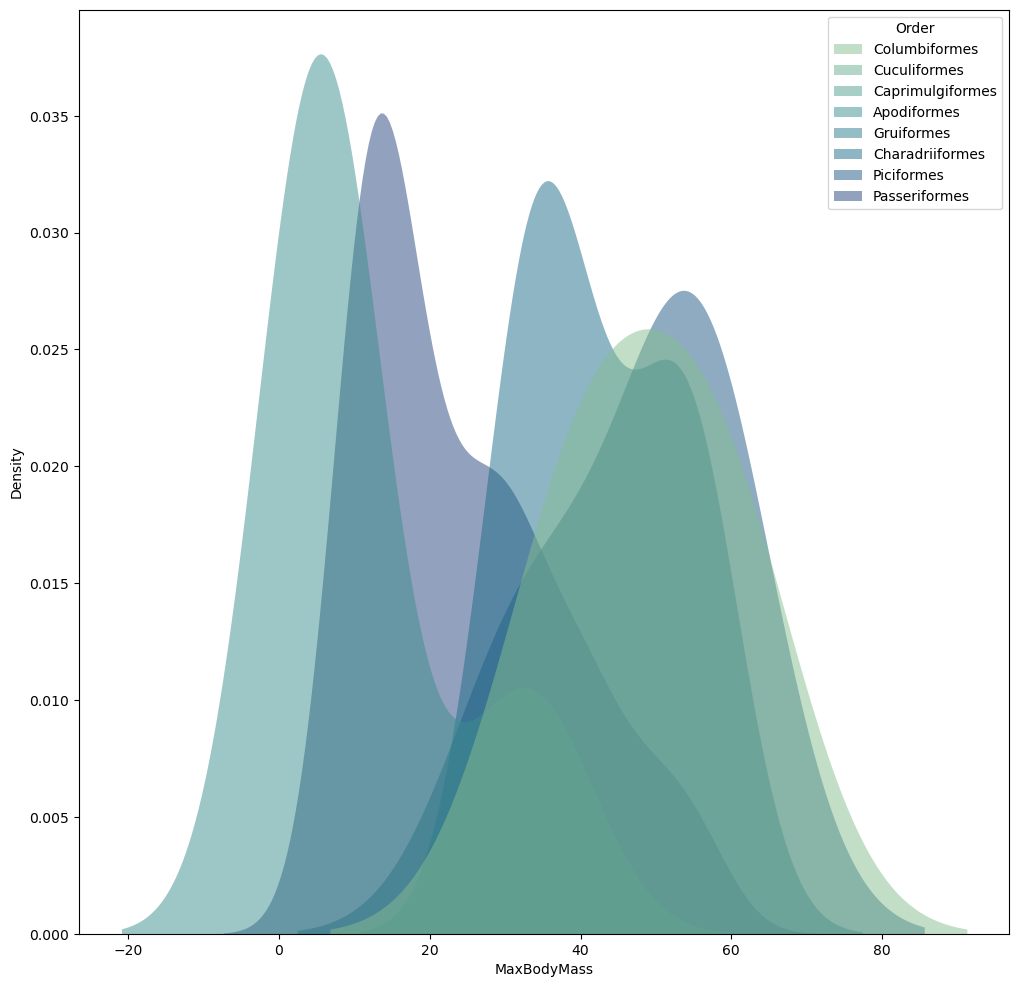

In [27]:
sns.kdeplot(
    data=filtered_birds, x='MaxBodyMass', hue='Order',
    fill=True, common_norm=False, palette='crest',
    alpha=.5, linewidth=0,
)

C:\Users\ia0070483\AppData\Local\Temp\ipykernel_39076\2203994574.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filtered_birds, x='MinLength', y='MaxLength', hue='ConservationStatus')


<Axes: xlabel='MinLength', ylabel='MaxLength'>

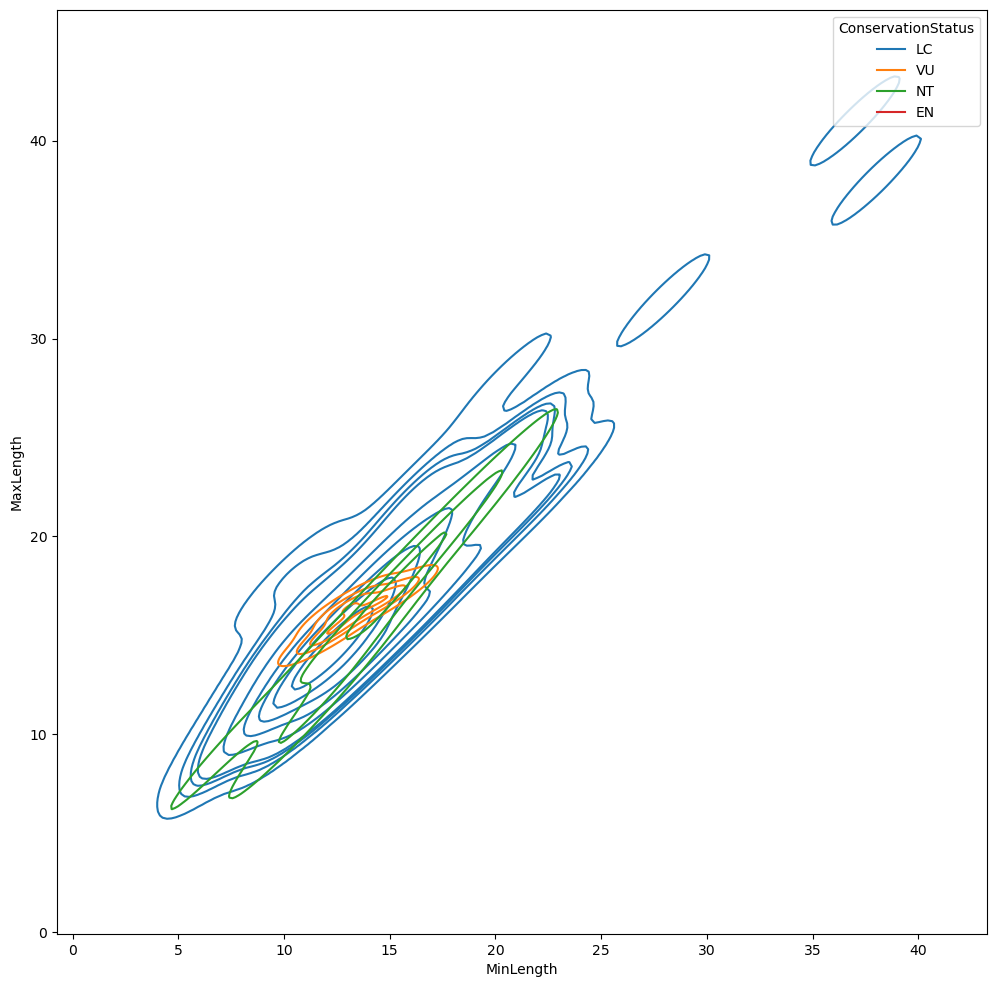

In [28]:
sns.kdeplot(data=filtered_birds, x='MinLength', y='MaxLength', hue='ConservationStatus')